## Logistic Regression

Despite the name, logistic regression is actually a method for classification. In classification problems, the response variable $Y$ is qualitative. One could imagine using linear regression to solve problems of classification by encoding the qualitative responses as quantitative responses. For example, in a 3-class classification problem, we could have $Y = 1, 2, 3$ and use least squares to fit the model. But by encoding this way, we inherently produce a model where the difference between classes 1 and 2 is equal to the difference between classes 2 and 3. This is so because in the response space, the quantitative variables are equally spaced. We also see predicted variables above and below the range, which are harder to interpret.

Logistic regression is typically used for binary classification problems. Although it can be extended to include multi-class models, Linear Discriminant Analysis tends to be more popular for such cases. We shall consider binary classification problems here.

In Linear Regression, the hypothesis $\hat{y}$ was modeled as:

$$\hat{y} = h_{\beta}(x) = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p$$

For Logistic Regression, we will modify the hypothesis function to accommodate binary classification. A typical choice is the __logistic__ (aka __sigmoid__) function:

$$\hat{y} = h_{\beta}(x) = \frac{1}{1 + exp(-\beta^Tx)}$$

In [1]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

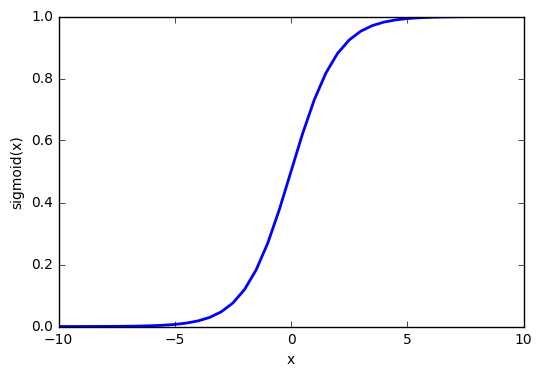

In [14]:
def sigmoid(x):
    return 1 / (1 + numpy.exp(-x))

x = numpy.arange(-10, 10, 0.5)
y = [sigmoid(i) for i in x]

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=2)
ax.set_xlabel('x')
ax.set_ylabel('sigmoid(x)')

From the above plot, we can see that the sigmoid tends towards 1 or 0 depending on whether x tends towards positive or negative infinity. Now, how do we fit $\beta$ for this model? From a probabilistic interpretation, let us assume

\begin{align}
&P(y = 1 \mid x; \beta) = h_{\beta}(x)\\
&P(y = 0 \mid x; \beta) = 1 - h_{\beta}(x)
\end{align}

This can be written as

$$p(y \mid x; \beta) = (h_{\beta}(x))^y (1 - h_{\beta}(x))^{1-y}$$

We can now write likelihood of parameters as

\begin{align}
L(\beta) & = p(y \mid x; \beta)\\
& = \prod_{i = 1}^{n} p(y_i \mid x_i; \beta)\\
& = \prod_{i - 1}^{n} (h_{\beta}(x_i))^{y_i} (1 - h_{\beta}(x_i))^{1-y_i}
\end{align}

It will be easier to maximize the log likelihood

\begin{align}
\ell(\beta) & = \log L(\beta)\\
& = \sum_{i = 1}^n y_i \log(h(x_i)) + (1 - y_i) \log (1 - h(x_i))
\end{align}

We can now find parameters by maximizing the log likelihood using Gradient Ascent. The gradient of the log likelihood is

$$\frac{\partial}{\partial \beta_i} \ell(\beta) = (y - h_\beta(x))x_i$$

The gradient (and hence, the update rule) seen here is very similar to the one in Linear Regression.

_To do: Add example_